## Import

In [8]:
#custom
from CustomEnv.ExploratoryDataAnalyzer import ExploratoryDataAnalyzer
from CustomEnv.Standardizer import Standardize

#pandas
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#plotting
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (27, 5)
import seaborn as sns

## Load

In [9]:
dfraw = pd.read_csv(r'..\raw_data\train.csv')
dfraw.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C


## Preprocess

In [10]:
class Preprocess:

    def __init__(self, df):
        self.df = df

        #columns
        self.colage = 'Age'
        self.colpassengerid = 'PassengerID'

    def standardize_survival(self):

        conversion_dict = {
            'died': ['0'],
            'survived': ['1'],
        }
        standardize = Standardize(df=self.df, print_conversions=False)
        standardize.standardize_column_values(conversion_dict=conversion_dict, current_col='Survived', revised_col='Survived_')
        self.df = standardize.df

    def bin_age(self):
        self.df['age_binned'] = pd.cut(dfraw.Age.astype(int), bins=5)
        self.df['age_binnedevenly'] = pd.qcut(dfraw.Age.astype(float), q=10)

    def run_pipeline(self):
        self.standardize_survival()
        self.bin_age()
        return self.df.head()

preprocess = Preprocess(df=dfraw)
preprocess.run_pipeline()
df_preprocessed = preprocess.df


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## Explore

In [ ]:
explore = ExploratoryDataAnalyzer(df=df_preprocessed, predictors=['Sex', 'Age', 'Fare'], target='Survived')

### Correlations

C:\Users\steve\OneDrive\Z_MyResources\Python\CustomEnv\ExploratoryDataAnalyzer.py:226: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = self.df.corr(method = 'pearson')


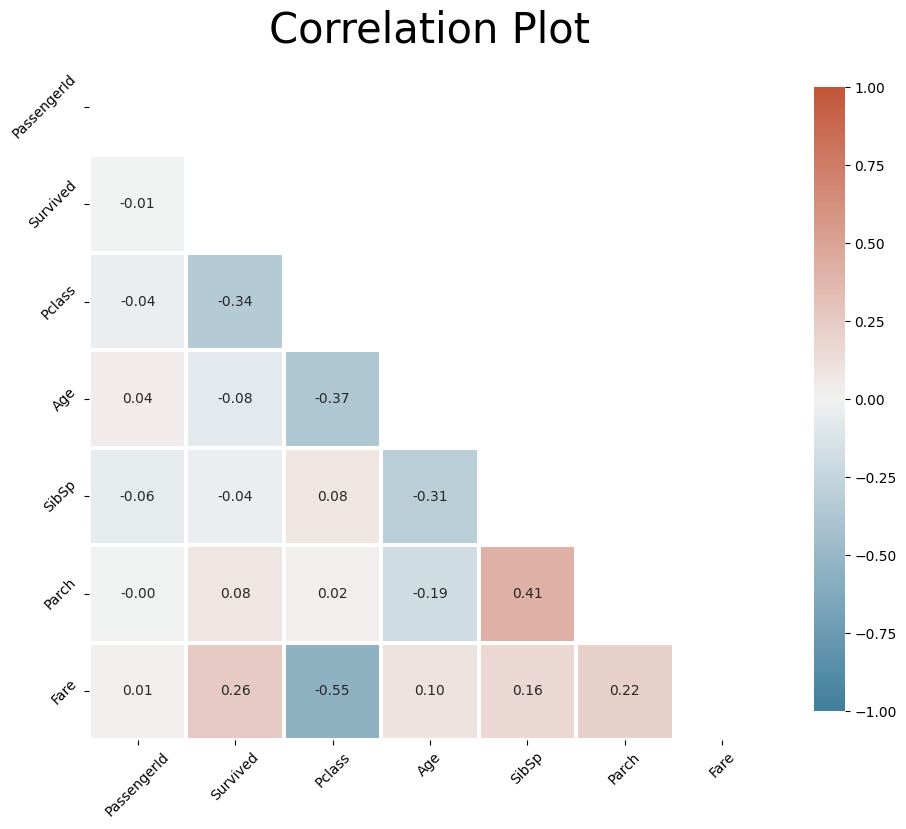

In [ ]:
explore.plot_correlation_matrix()

### Blanks

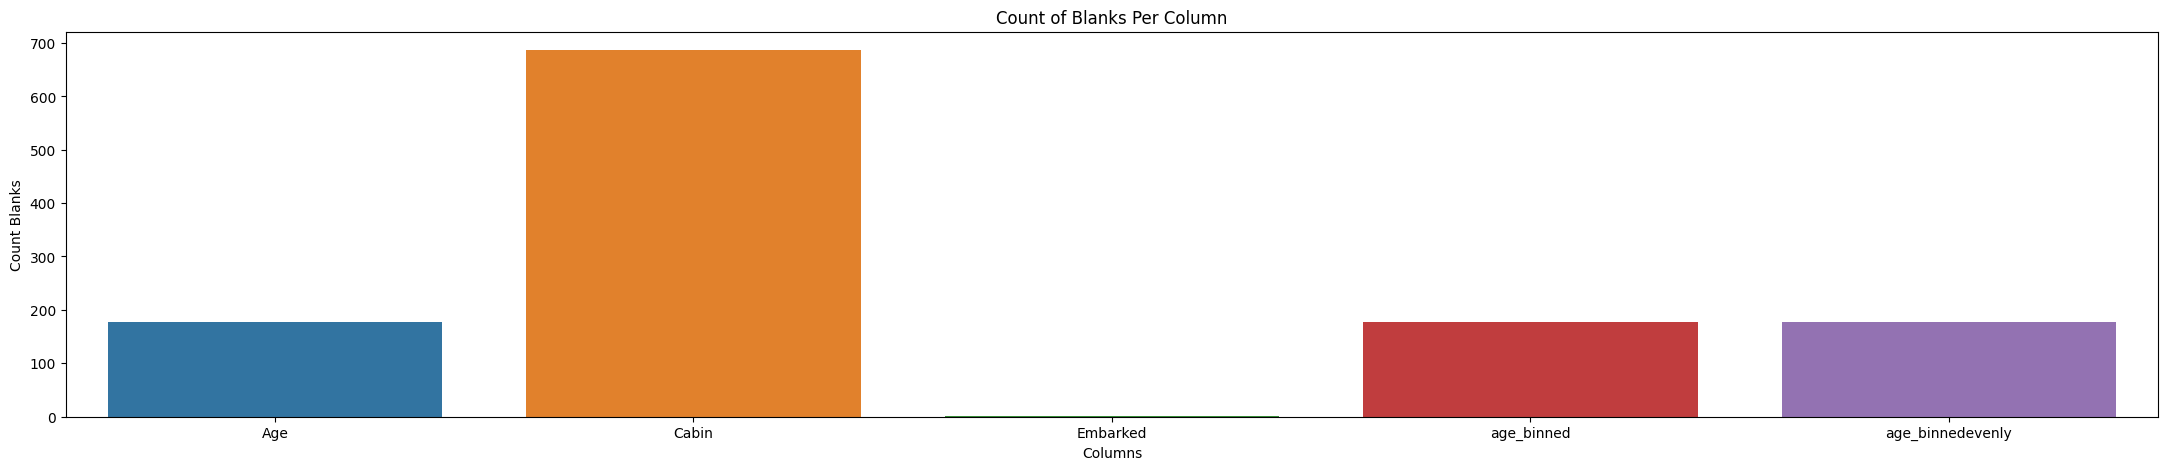

891

In [ ]:
explore.plot_blanks_per_column()
len(df_preprocessed)

### Target Balance

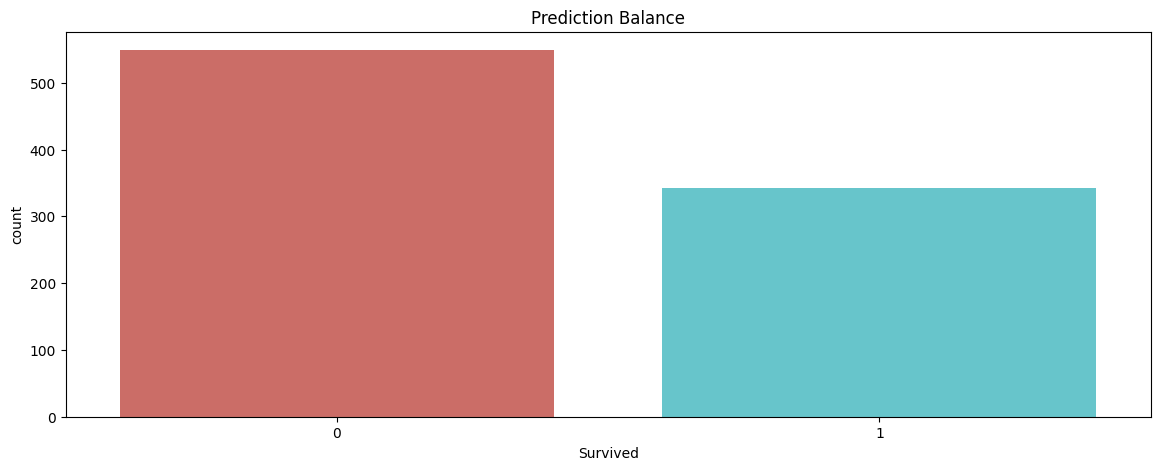

In [ ]:
explore.plot_target_balance()

### Grouping Statistics

In [ ]:
explore.show_target_grouping_statistics()
eda = dict()
eda['grouping stats'] = 'Age is slightly higher on '

mean stats: 
    PassengerId  Pclass  Age  SibSp  Parch  Fare
0          447       3   31      1      0    22
1          444       2   28      0      0    48 

median stats: 
    PassengerId  Pclass  Age  SibSp  Parch  Fare
0          455       3   28      0      0    10
1          440       2   28      0      0    26 



C:\Users\steve\OneDrive\Z_MyResources\Python\CustomEnv\ExploratoryDataAnalyzer.py:86: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = self.df.groupby(self.target).mean().round(0).reset_index(drop=True)
C:\Users\steve\OneDrive\Z_MyResources\Python\CustomEnv\ExploratoryDataAnalyzer.py:87: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = self.df.groupby(self.target).median().reset_index(drop=True)


### Distributions

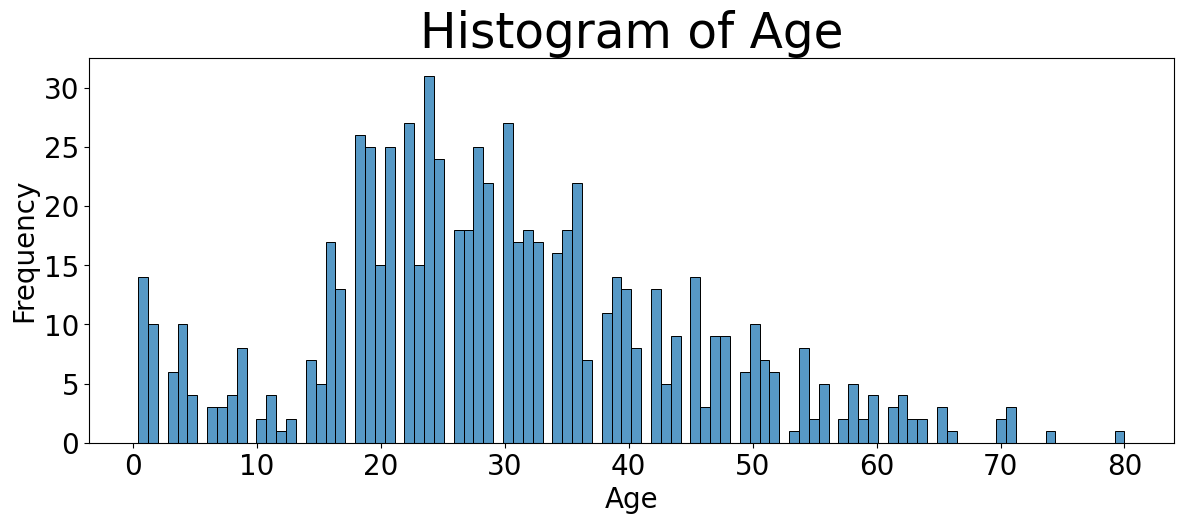

Age Statistics
skew: 0.39
kurtosis: 0.18
mean: 29.7 || median: 28.0 || mode: [24.0]
min: 0.42 || max: 80.0




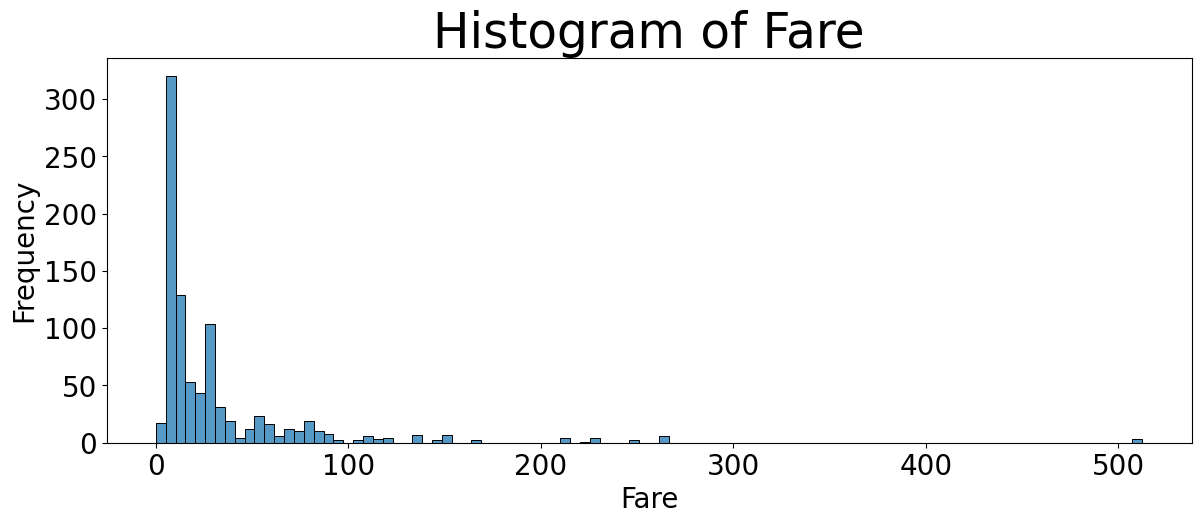

Fare Statistics
skew: 4.79
kurtosis: 33.4
mean: 32.2 || median: 14.5 || mode: [8.0]
min: 0.0 || max: 512.33




In [ ]:
explore.plot_distribution(of_columns=['Age', 'Fare'])

explore.plot_n_lowest_and_highest_category_against_target(category='Age', n=5)

### Show Proportions

In [ ]:
dfproportions = explore.show_proportions(col='Age', verbose=False)
dfproportions.head(10)

C:\Users\steve\OneDrive\Z_MyResources\Python\CustomEnv\ExploratoryDataAnalyzer.py:58: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  self.df.style.set_precision(0)


,Count,Percent,Cumulative %
24,30,4,4
22,27,4,8
18,26,4,12
19,25,4,15
28,25,4,19
30,25,4,22
21,24,3,25
25,23,3,29
36,22,3,32
29,20,3,35


In [ ]:
dfproportions = explore.show_proportions(col='age_binned', verbose=False)
dfproportions.head(10)

C:\Users\steve\OneDrive\Z_MyResources\Python\CustomEnv\ExploratoryDataAnalyzer.py:58: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  self.df.style.set_precision(0)


,Count,Percent,Cumulative %
"(16.336, 32.252]",346,48,48
"(32.252, 48.168]",188,26,75
"(0.34, 16.336]",100,14,89
"(48.168, 64.084]",69,10,98
"(64.084, 80.0]",11,2,100


In [ ]:
#explore.multi_ecdf(series_to_compute=)

In [ ]:
#explore.plot_categorical_outlier_impact_on_target_variable()

### Who Survived

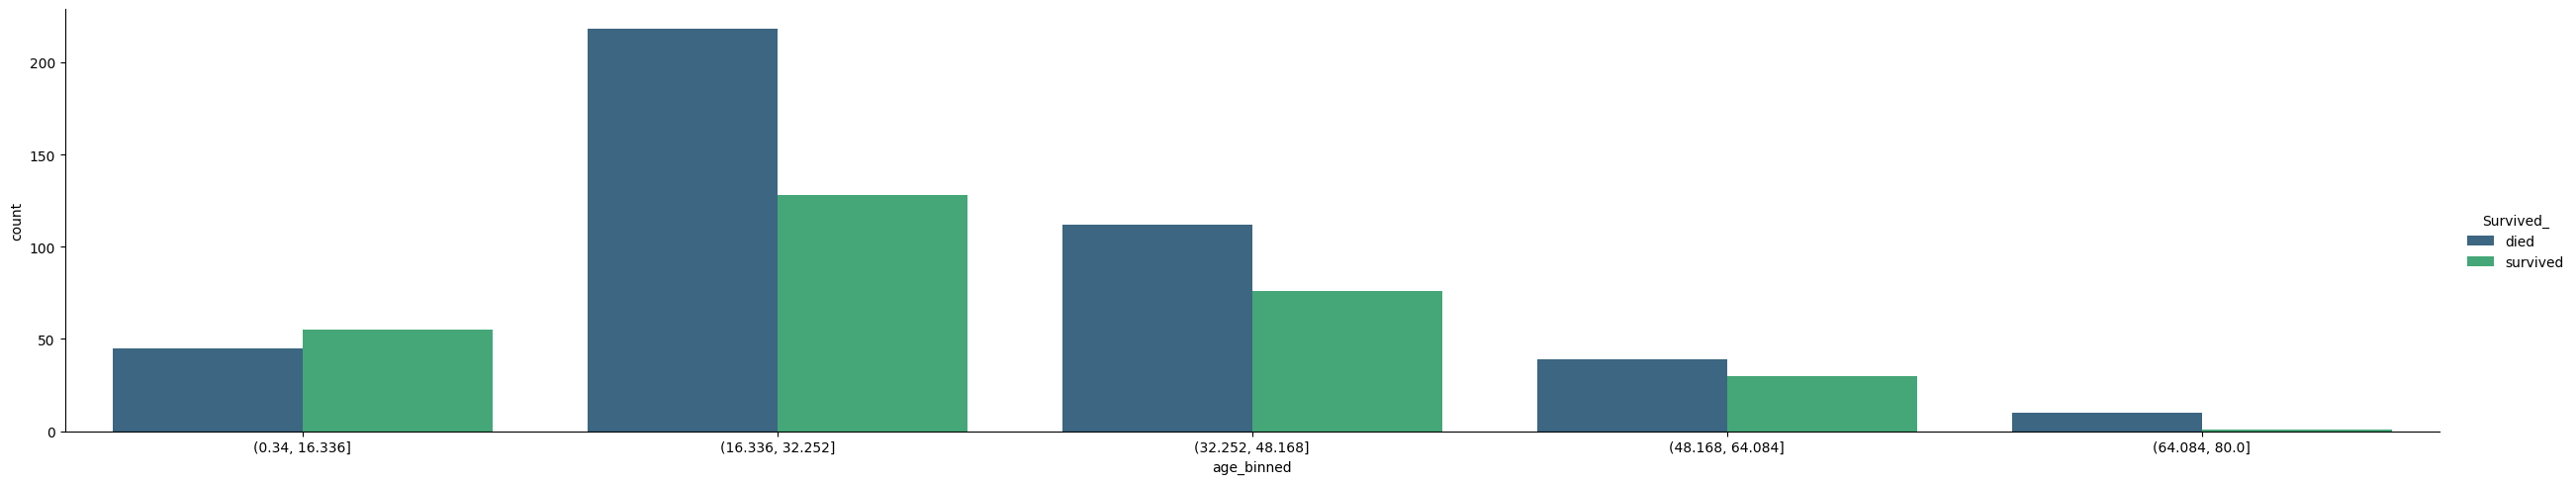

In [ ]:
def group_by_age_and_surivival(df):
    #nipy_spectral, prism_r, seismic_r, viridis, winter
    sns.catplot(data=df, x='age_binned', hue='Survived_', palette='viridis', kind='count', height=5, aspect=5)
    plt.show()
    print()
group_by_age_and_surivival(df_preprocessed)

### Additional

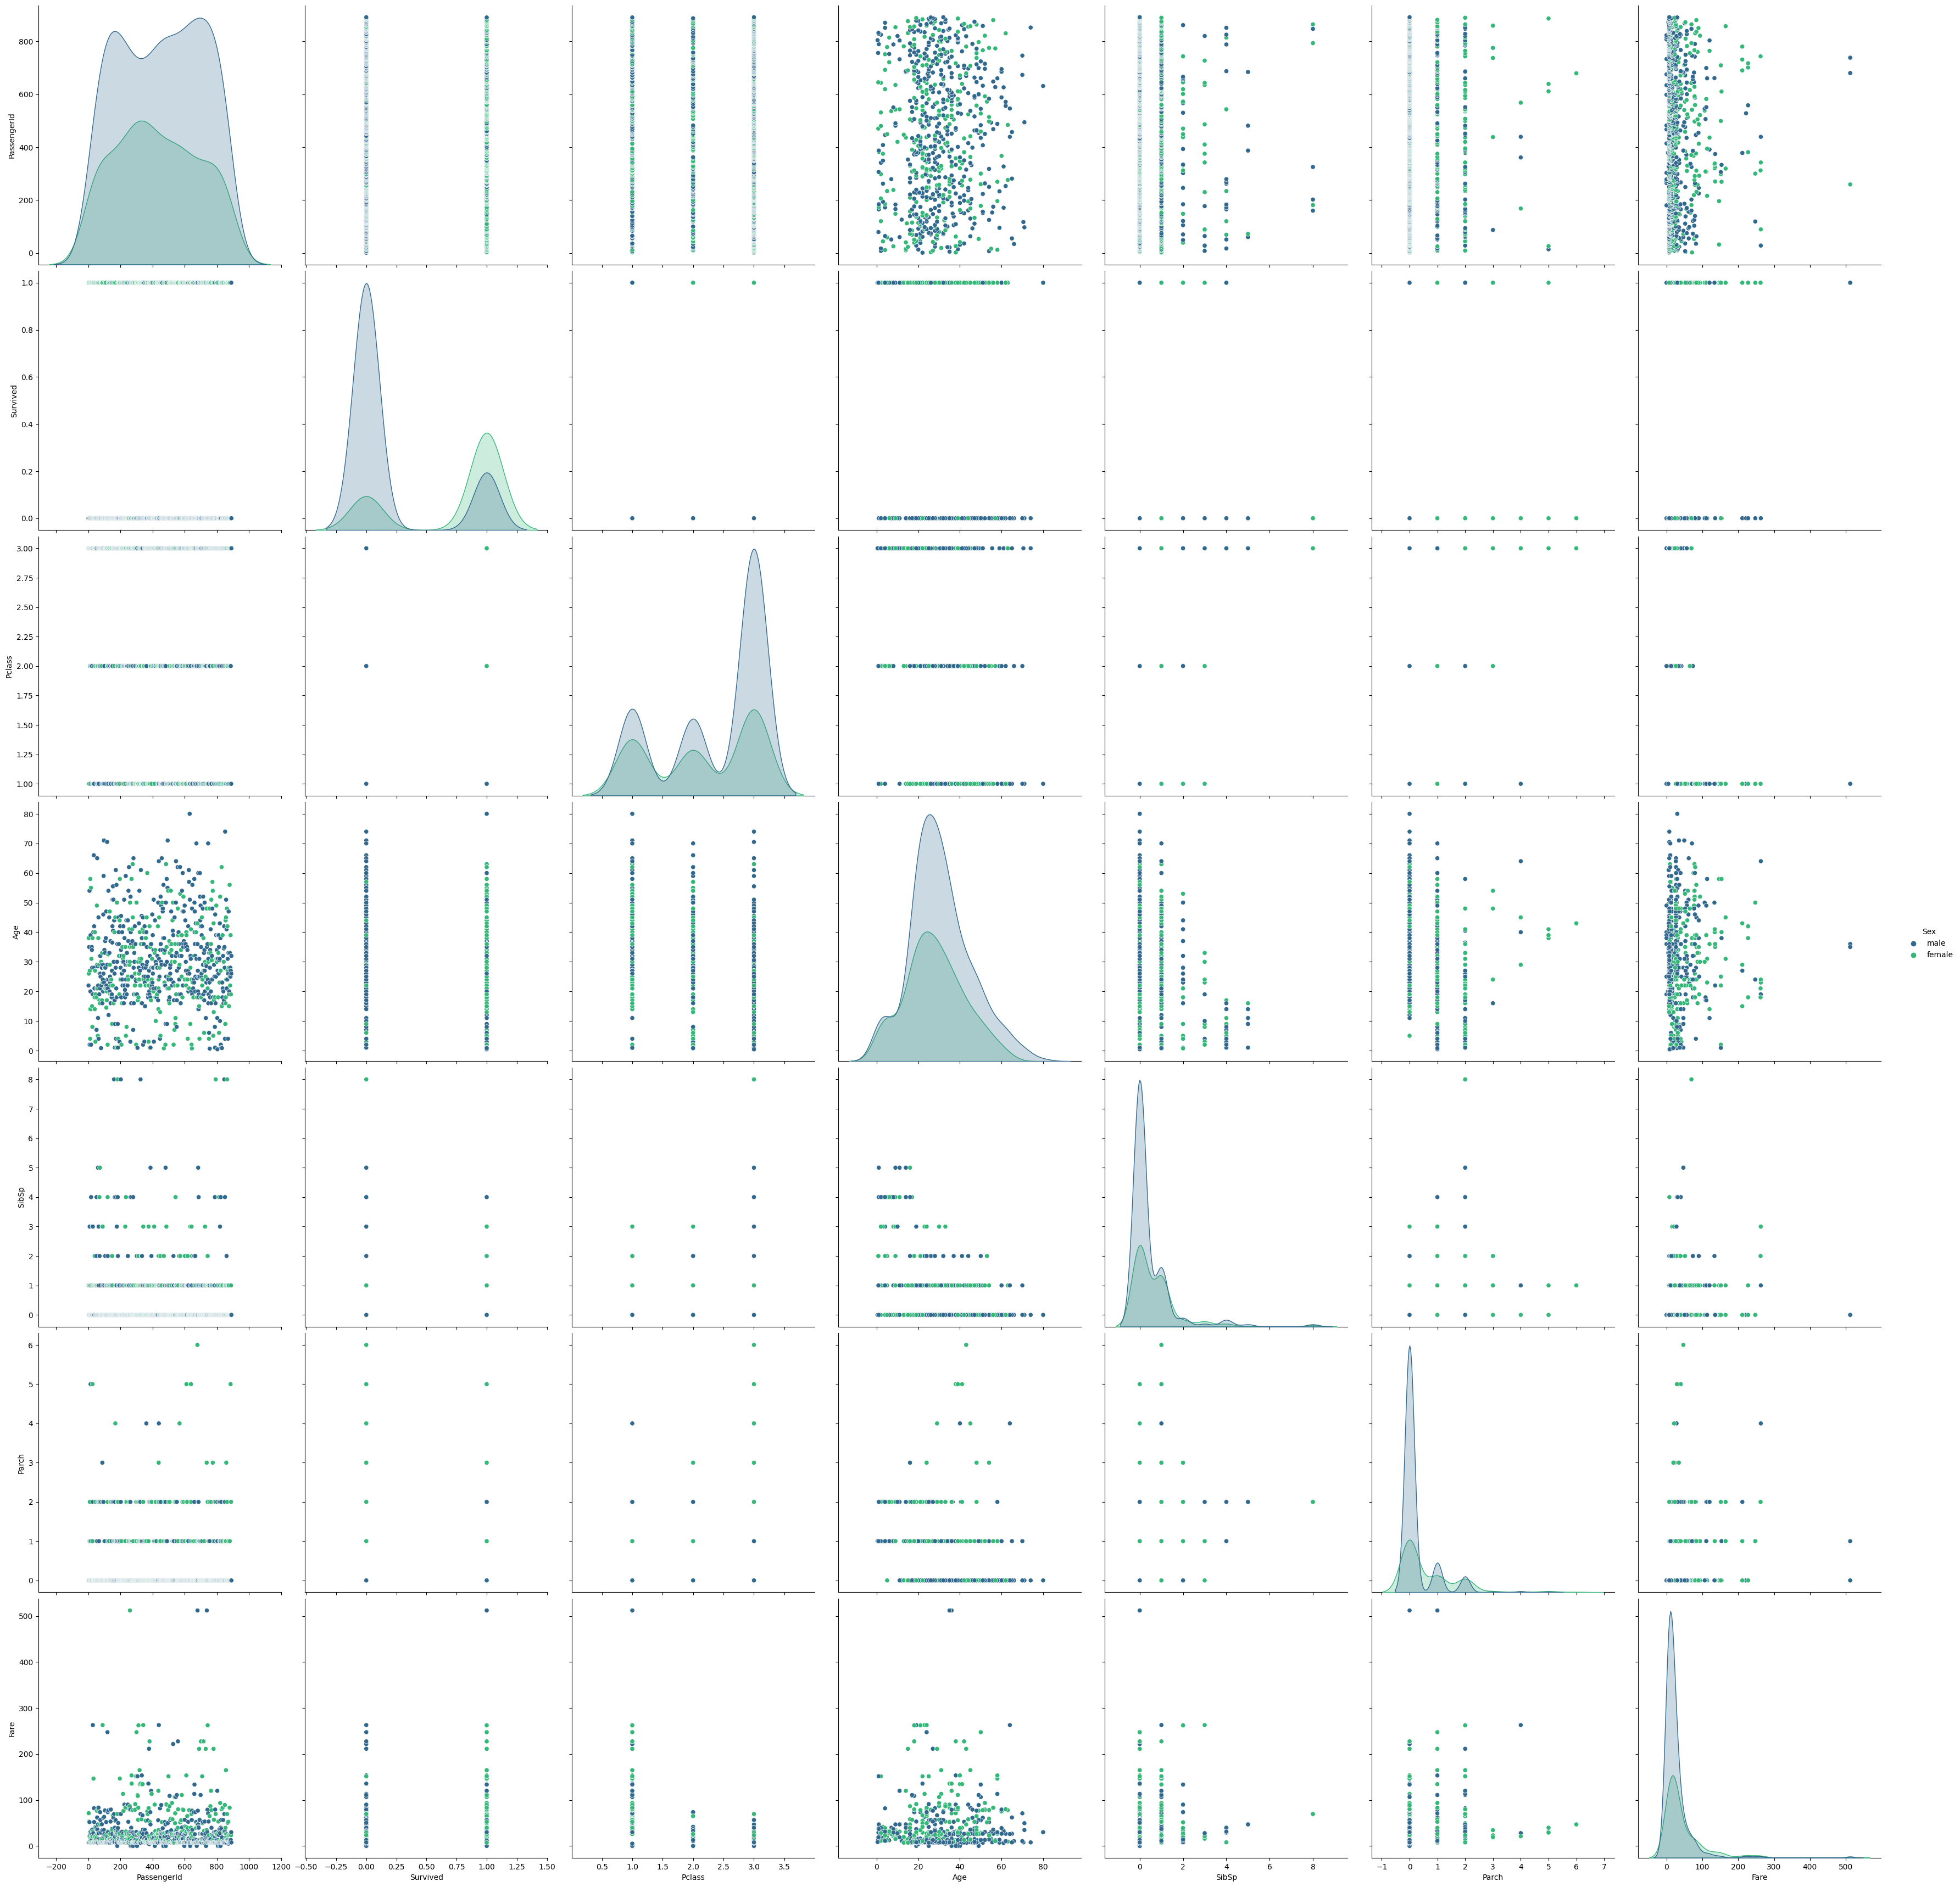

In [ ]:
sns.pairplot(data=df_preprocessed, hue='Sex', palette='viridis', height=5, aspect=1)
plt.show()

## Preprocess Data